# Anchor E+V merged object to scRNA-seq

## Set up correct conda environment


In [1]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

## Load packages

In [2]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



Attaching shinyBS

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following ob

In [3]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/users/xjluo/miniconda3/envs/jupyter_env/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1                     ggpointdensity_0.1.0              
 [3] BSgenome.Mmusculus.UCSC.mm10_1.4.3 BSgenome_1.68.0                   
 [5] rtracklayer_1.60.1                 Bi

In [4]:
sample1 <- 'E1'
sample2 <- 'V1'

## STEP 0: Paths

In [5]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC"

In [6]:
merge_savedir <- paste0(data_master_dir, '/xjluo_analysis/step2_merge')

merge_savedir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step2_merge"

In [7]:
# E+V merged object (no cell type labels)

E_V.atac.obj.path <- paste0(merge_savedir, '/E_V/', sample1, '_', sample2, '_', 'merged.rds')

E_V.atac.obj.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step2_merge/E_V/E1_V1_merged.rds"

In [8]:
data_master_dir_old <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC'
rna_path <- paste0(data_master_dir_old, '/', 'RNA', '/', 'ctx.Robj')

rna_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/RNA/ctx.Robj"

In [9]:
# save output (labeled) object in this folder
merge_savedir <- paste0(data_master_dir, '/xjluo_analysis/step2_merge')

merge_savedir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step2_merge"

In [10]:
# Define the directory to save plots
plot_save_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step3_figures'
plot_save_dir_merged <- paste0(plot_save_dir, '/', '03_', sample1, '_', sample2, '_merged')

plot_save_dir_merged

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step3_figures/03_E1_V1_merged"

## STEP 1: Load objects

In [11]:
E_V.merged.atac.obj <- readRDS(E_V.atac.obj.path)

In [12]:
load(rna_path)

# NOTE: the 'v4' in variable names is just for convenience, since this notebook is adapted from a previous ATAC dataset.
# Seurat v5 is now used.

rna.obj <- ctx


In [13]:
E_V.merged.atac.obj

An object of class Seurat 
325206 features across 4908 samples within 1 assay 
Active assay: ATAC (325206 features, 325187 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

In [14]:
rna.obj

An object of class Seurat 
32475 features across 7158 samples within 6 assays 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 5 other assays present: ADT, prediction.score.class, prediction.score.cluster, prediction.score.subclass, prediction.score.cross_species_cluster
 5 dimensional reductions calculated: integrated_dr, ref.umap, pca, umap.unintegrated, umap

In [15]:
Idents(rna.obj) <- 'orig.ident'

# Uncomment below line if this notebook focuses on the GFP+ only scRNA-seq experiment

# Now called "GFP2" as of July 22, 2024. Previous RNA object used "GFP"
rna.obj <- subset(x = rna.obj, idents = c('GFP2'))

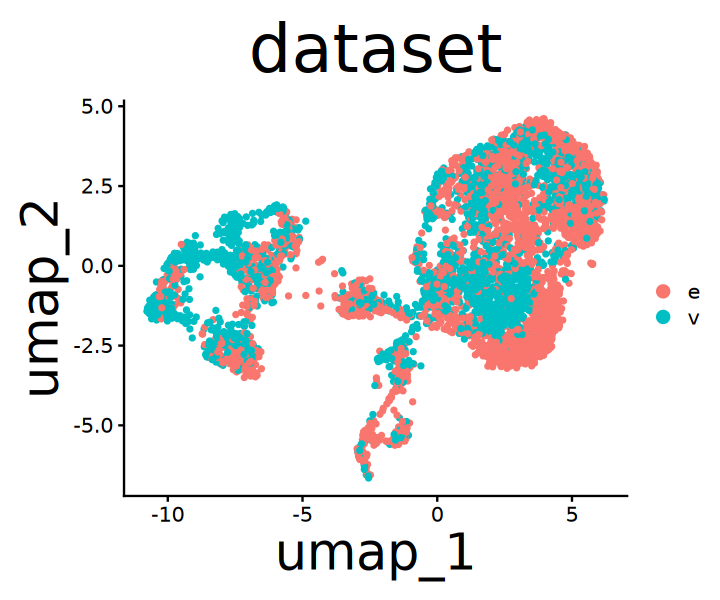

In [16]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(E_V.merged.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

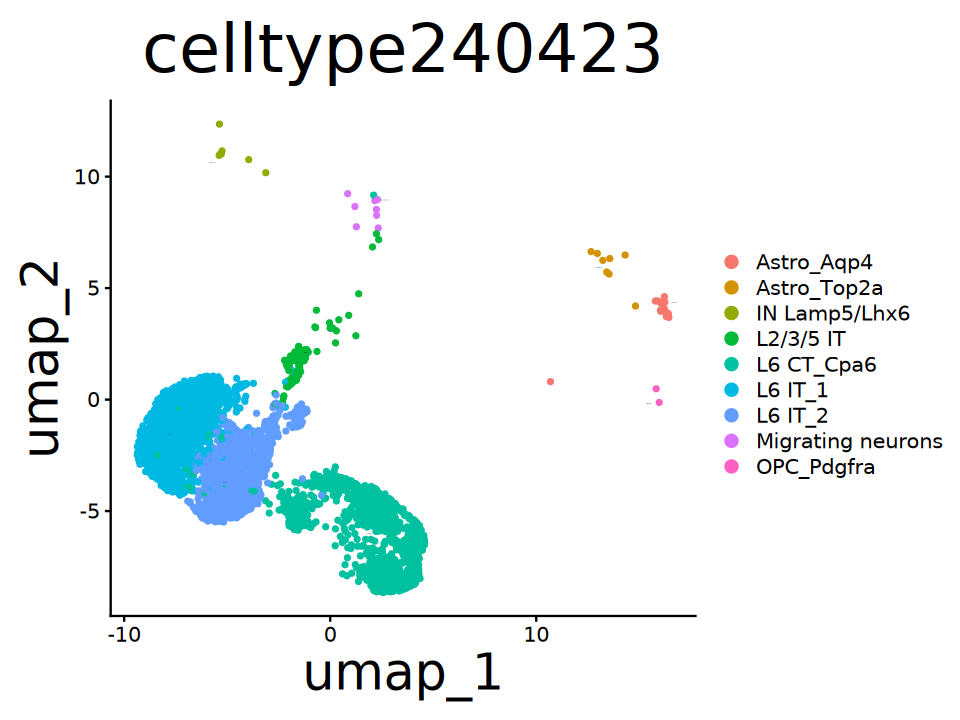

In [17]:
# RNA
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(rna.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.size=1, label.size=0, reduction = "umap", group.by = 'celltype240423', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     


## STEP 2: Anchor snATAC-seq to scRNA-seq

In [18]:
# get gene annotations for mm10
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)
seqlevelsStyle(annotation) <- "UCSC"


# set gene annotations
Annotation(E_V.merged.atac.obj) <- annotation

# https://stuartlab.org/signac/articles/data_structures

In [19]:
# quantify gene activity
DefaultAssay(E_V.merged.atac.obj) <- 'ATAC'
gene.activities <- GeneActivity(E_V.merged.atac.obj, features = VariableFeatures(rna.obj))

Extracting gene coordinates

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions



In [20]:
# add gene activities as a new assay
E_V.merged.atac.obj[["ACTIVITY"]] <- CreateAssayObject(counts = gene.activities)

# normalize gene activities
DefaultAssay(E_V.merged.atac.obj) <- "ACTIVITY"
E_V.merged.atac.obj <- NormalizeData(E_V.merged.atac.obj)
E_V.merged.atac.obj <- ScaleData(E_V.merged.atac.obj, features = rownames(E_V.merged.atac.obj))

Centering and scaling data matrix



In [21]:
# Identify anchors
transfer.anchors <- FindTransferAnchors(reference = rna.obj, 
                                        query = E_V.merged.atac.obj, 
                                        features = VariableFeatures(object = rna.obj),
                                        reference.assay = "RNA", 
                                        query.assay = "ACTIVITY", 
                                        reduction = "cca")

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 13510 anchors



## STEP 3: Annotate snATAC-seq cells via label transfer

In [22]:
table(rna.obj$celltype240423)


       Astro_Aqp4       Astro_Top2a     IN Lamp5/Lhx6         L2/3/5 IT 
               19                 8                 7                89 
       L6 CT_Cpa6           L6 IT_1           L6 IT_2 Migrating neurons 
             1341              1440              1199                 8 
       OPC_Pdgfra 
                2 

In [23]:
celltype.predictions <- TransferData(anchorset = transfer.anchors, 
                                     refdata = rna.obj$celltype240423,
                                     weight.reduction = E_V.merged.atac.obj[["lsi"]], 
                                     dims = 2:30)

E_V.merged.atac.obj <- AddMetaData(E_V.merged.atac.obj, metadata = celltype.predictions)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [24]:
colnames(E_V.merged.atac.obj@meta.data)

[1] "orig.ident"                         "nCount_ATAC"                       
 [3] "nFeature_ATAC"                      "nucleosome_signal"                 
 [5] "nucleosome_percentile"              "TSS.enrichment"                    
 [7] "TSS.percentile"                     "ATAC_snn_res.1.2"                  
 [9] "seurat_clusters"                    "dataset"                           
[11] "nCount_ACTIVITY"                    "nFeature_ACTIVITY"                 
[13] "predicted.id"                       "prediction.score.L6.IT_1"          
[15] "prediction.score.L6.CT_Cpa6"        "prediction.score.L6.IT_2"          
[17] "prediction.score.L2.3.5.IT"         "prediction.score.Astro_Aqp4"       
[19] "prediction.score.Migrating.neurons" "prediction.score.IN.Lamp5.Lhx6"    
[21] "prediction.score.OPC_Pdgfra"        "prediction.score.Astro_Top2a"      
[23] "prediction.score.max"

## STEP 4: Visualize anchoring result

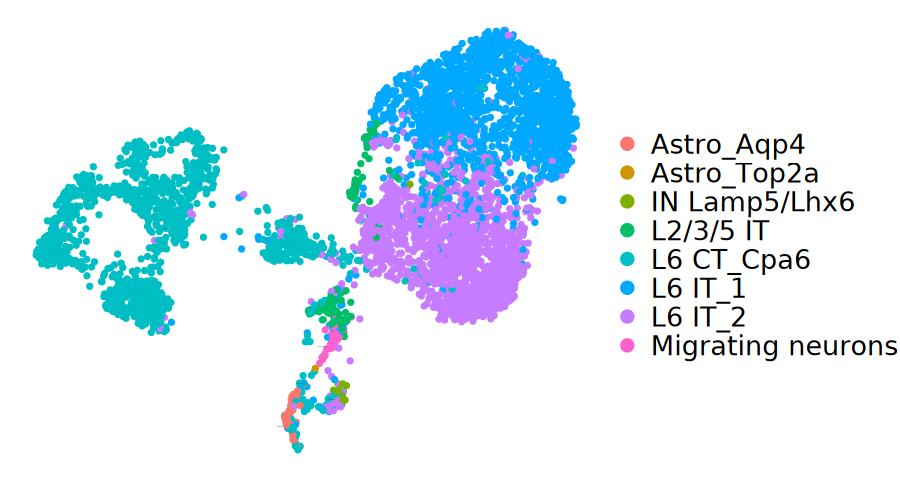

In [25]:
options(repr.plot.width=7.5, repr.plot.height=4)

## Define a custom theme for the plots
custom_theme <- theme_void() + 
  theme(
    plot.title = element_blank(), # Remove plot title
    axis.title = element_blank(), # Remove axis titles
    axis.text = element_blank(),  # Remove axis text
    axis.ticks = element_blank(), # Remove axis ticks
    legend.text = element_text(size = 16) # Increase legend text size, if applicable
  )

# Create UMAP plot grouped by "assay"
E_V_merged_annotated_umap_plot <- DimPlot(E_V.merged.atac.obj, 
        label = TRUE, 
        repel = TRUE, 
        pt.size=1, 
        label.size=0, 
        reduction = "umap", 
        group.by = 'predicted.id') + custom_theme


# Display the plots
print(E_V_merged_annotated_umap_plot)


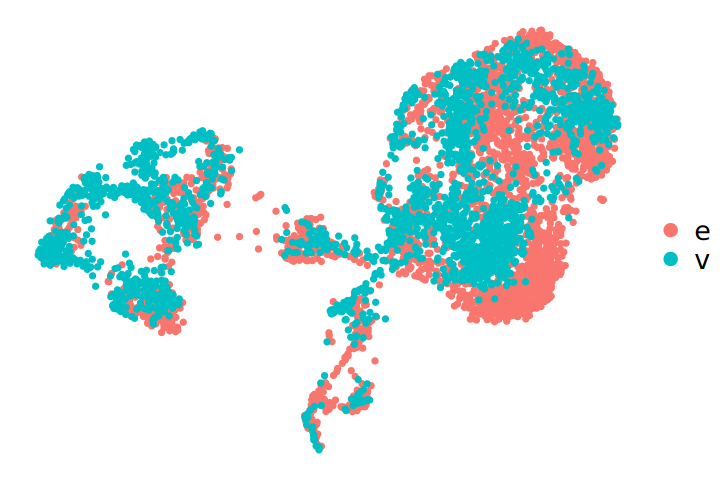

In [26]:
options(repr.plot.width=6, repr.plot.height=4)

## Define a custom theme for the plots
custom_theme <- theme_void() + 
  theme(
    plot.title = element_blank(), # Remove plot title
    axis.title = element_blank(), # Remove axis titles
    axis.text = element_blank(),  # Remove axis text
    axis.ticks = element_blank(), # Remove axis ticks
    legend.text = element_text(size = 16) # Increase legend text size, if applicable
  )

# Create UMAP plot grouped by "assay"
E_V_merged_annotated_umap_dataset <- DimPlot(E_V.merged.atac.obj, 
        label = TRUE, 
        repel = TRUE, 
        pt.size=1, 
        label.size=0, 
        reduction = "umap", 
        group.by = 'dataset') + custom_theme


# Display the plots
print(E_V_merged_annotated_umap_dataset)


In [27]:
table(E_V.merged.atac.obj$predicted.id)


       Astro_Aqp4       Astro_Top2a     IN Lamp5/Lhx6         L2/3/5 IT 
               45                 2                13               102 
       L6 CT_Cpa6           L6 IT_1           L6 IT_2 Migrating neurons 
             1359              1706              1653                28 

## STEP 5: Save plots 

In [28]:
# Ensure the directory exists
if (!dir.exists(plot_save_dir_merged)) {
  dir.create(plot_save_dir_merged, recursive=TRUE)
}

In [29]:
# Save the UMAP plot grouped by "assay"
ggsave(file.path(plot_save_dir_merged, "E_V_merged_umap_celltype.pdf"), plot = E_V_merged_annotated_umap_plot, device = "pdf", dpi = 300, width = 7.5, height = 4)

# Save the UMAP plot grouped by "celltype240423"
ggsave(file.path(plot_save_dir_merged, "E_V_merged_umap_dataset.pdf"), plot = E_V_merged_annotated_umap_dataset, device = "pdf", dpi = 300, width = 6, height = 4)


## STEP 6: Save labeled snATAC-seq object 

In [30]:
merge_savedir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step2_merge"

In [31]:
E_V.merged.atac.obj

An object of class Seurat 
326734 features across 4908 samples within 2 assays 
Active assay: ACTIVITY (1528 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

In [32]:
Version(E_V.merged.atac.obj)

[1] '5.0.2'

In [33]:
saveRDS_path <- paste0(merge_savedir, '/E_V/', sample1, '_', sample2, "_merged.annotated.rds")
saveRDS(E_V.merged.atac.obj, file = saveRDS_path)

print('Object saved')

[1] "Object saved"


In [34]:
saveRDS_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step2_merge/E_V/E1_V1_merged.annotated.rds"

# END